# Trabajo Práctico 2

1. Implemente un perceptrón simple que aprenda la función lógica AND y la función
lógica OR, de 2 y de 4 entradas. Muestre la evolución del error durante el
entrenamiento. Para el caso de 2 dimensiones, grafique la recta discriminadora y todos
los vectores de entrada de la red

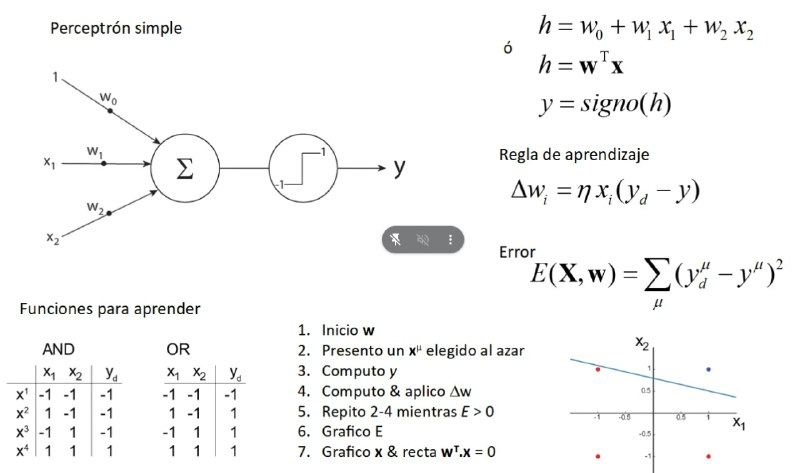

In [42]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return


import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100, error = 100):
        self.weights = np.zeros(input_size +1)  # +1 for the bias term
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.error = error


    def activation_function(self, x):
        return 1 if x > 0 else -1

    def predict(self, x):
        z = self.weights.T.dot(np.insert(x, 0, 1))  # Insert 1 for the bias term
        return self.activation_function(z)

    def ECM(self, yd, y):
        self.error = sum((yd - y) **2 for yd, y in zip(yd, y))
        return self.error
    def fit(self, X, y):
        for epoch in range(self.epochs):
            if self.error == 0:
                break
            indexes = np.random.permutation(len(y))
            for index in indexes:
                prediction = self.predict(X[index])
                self.weights[1:] += self.learning_rate * (y[index] - prediction) * X[index]
                self.weights[0] += self.learning_rate * (y[index] - prediction)
                y_pred = [self.predict(xi) for xi in X]
                self.ECM(y, y_pred)
            plt.plot(epoch +1, self.ECM(y, y_pred), 'ro')
            plt.xlabel('Epoch')
            plt.ylabel('Error')
            plt.title('Error vs Epoch')
    def fit_nograph(self, X, y):
            indexes = np.random.permutation(len(y))
            for index in indexes:
                prediction = self.predict(X[index])
                self.weights[1:] += self.learning_rate * (y[index] - prediction) * X[index]
                self.weights[0] += self.learning_rate * (y[index] - prediction)        


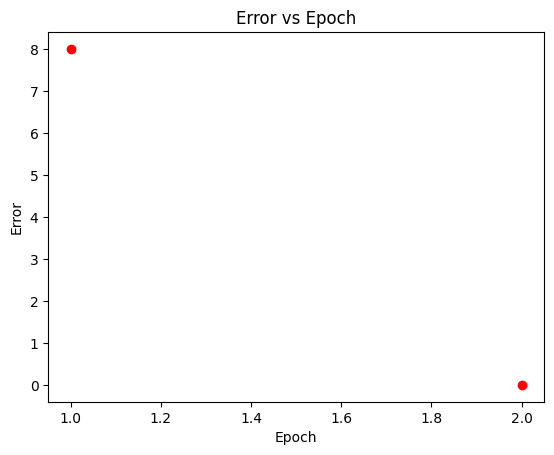

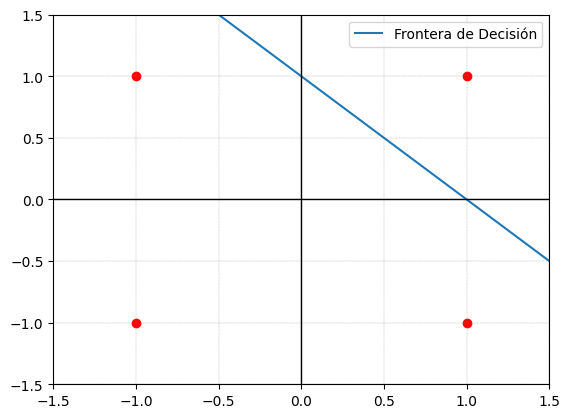

In [44]:
x_and = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_and = np.array([-1, -1, -1, 1])
perceptron_and = Perceptron(2)
perceptron_and.fit(x_and, y_and)
plt.figure()
plt.scatter(x_and[:, 0], x_and[:, 1], c="red")
x_values = np.linspace(-3, 3, 100)
y_values = -(perceptron_and.weights[1] * x_values + perceptron_and.weights[0]) / perceptron_and.weights[2]
plt.plot(x_values, y_values, label='Frontera de Decisión')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()


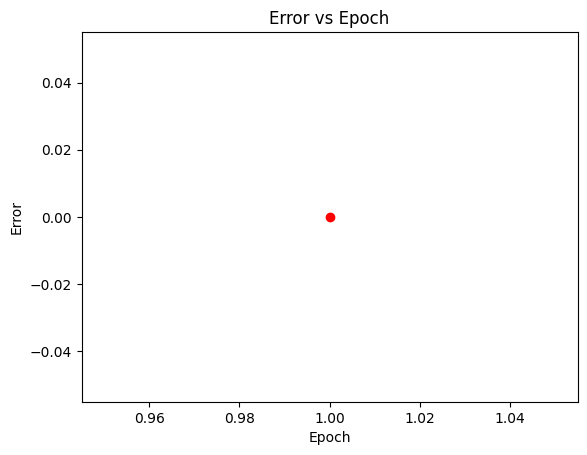

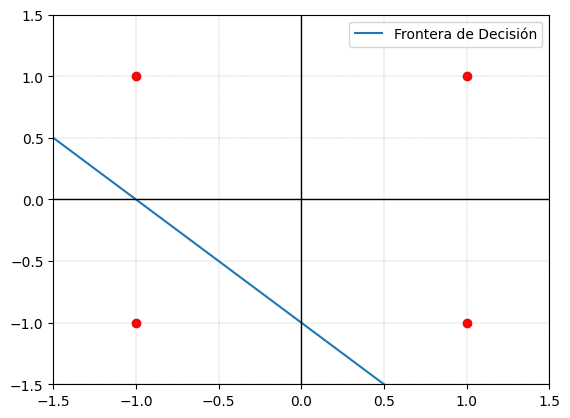

In [48]:
x_or = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_or = np.array([-1, 1, 1, 1])
perceptron_or = Perceptron(2)
perceptron_or.fit(x_or, y_or)
plt.figure()
plt.scatter(x_or[:, 0], x_or[:, 1], c="red")
x_values = np.linspace(-3, 3, 100)
y_values = -(perceptron_or.weights[1] * x_values + perceptron_or.weights[0]) / perceptron_or.weights[2]
plt.plot(x_values, y_values, label='Frontera de Decisión')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()




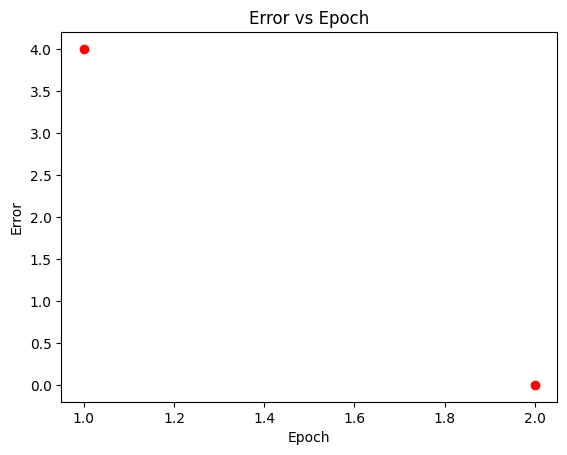

In [17]:
import itertools

permutations = list(itertools.product([True, False], repeat=4))
y4_and = []
for p in permutations:
    if p[0] and p[1] and p[2] and p[3]:
        y4_and.append(1)
    else:
        y4_and.append(-1)

x4_and = np.array(permutations)
x4_and = np.where(x4_and, 1, -1)

perceptron_4_and = Perceptron(4)
perceptron_4_and.fit(x4_and, y4_and)


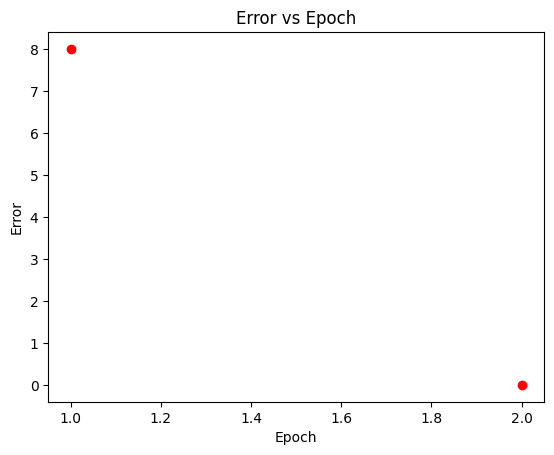

In [18]:
x4_or = x4_and.copy()
y4_or = []
for p in permutations:
    if p[0] or p[1] or p[2] or p[3]:
        y4_or.append(1)
    else:
        y4_or.append(-1)

perceptron_4_or = Perceptron(4)
perceptron_4_or.fit(x4_or, y4_or)



2) Determine numéricamente cómo varía la capacidad del perceptrón simple en función
del número de patrones enseñados.

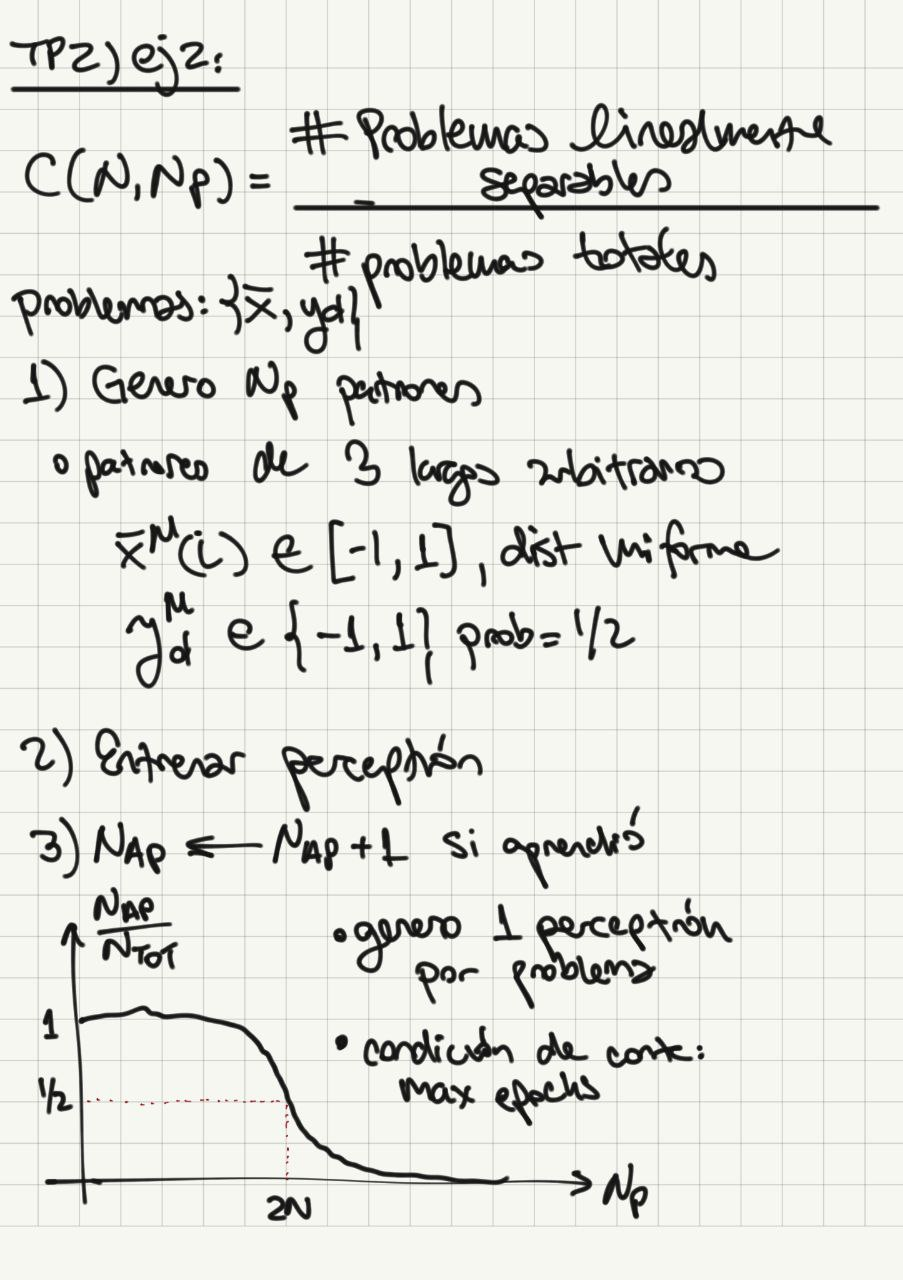

In [19]:
%%skip
dims = [5, 10, 15, 20, 25]
Np = 60
Ntot = 80
maxEpochs = 20
jump = 5
naps = []
for patDim in dims:
    Nap = np.zeros(Np)
    for i in range(0, Np, jump):
        for n in range(Ntot):
            patterns = np.random.uniform(-1, 1, (i, patDim))
            yd = np.random.choice([-1, 1], i)
            perceptron = Perceptron(patDim)
            for epoch in range(maxEpochs):
                if perceptron.ECM(yd, [perceptron.predict(xi) for xi in patterns]) == 0:
                    Nap[i//jump]+=1
                    break
                perceptron.fit_nograph(patterns, yd)
    naps.append(Nap)                

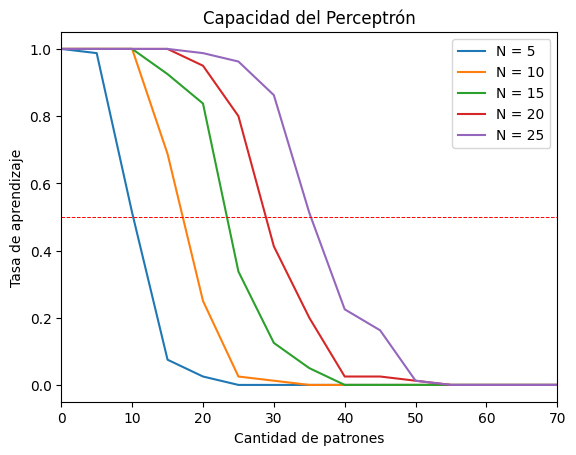

In [20]:
x_range = np.arange(0, jump * Np, jump)
for i in range(len(dims)):
    plt.plot(x_range, naps[i] / Ntot,label=f'N = {dims[i]}')

plt.xlim(0, Np+10)
plt.axhline(y= 0.5, color='r', linestyle='--', linewidth = 0.7)   
plt.xlabel('Cantidad de patrones')
plt.ylabel('Tasa de aprendizaje')
plt.title('Capacidad del Perceptrón')
plt.legend()
plt.show()



In [49]:
class MultiLayerPerceptron:
    def __init__(self, layers, learning_rate=0.1, epochs=100):
        self.layers = [Perceptron(input_size, learning_rate, epochs) for input_size in layers]
        self.__deltas = [np.zeros(layer.weights.shape) for layer in self.layers]
    def g(self, x):
            return np.tanh(x)
    def g_prime(self, x):
        return 1 - np.tanh(x) ** 2
    def backprop(self, X, y):
        delta_y = -self.g_prime(self.layers[-1].weights.dot(self.layers[-1].activations)) * (y - self.layers[-1].activations)
        return 
    def predict(self, X):
        activations = X
        for layer in self.layers:
            activations = layer.predict(activations)
        return activations

In [52]:
mlp = MultiLayerPerceptron([2, 2, 1])